
# CUS615 Demo code on KNN classifier 
This file includes a sample code on the materials we discussed in class. Use it as a playground to try the different methods. You can use it as a reference to implement your assignment.

The code below demonstrates the following
* loads a sample dataset in 2D feature spaces,
* splits the dataset into training and testing sets, 
* inspects the data characteristics/statistics.
* trains a KNN classifier on the training dataset.
* applied the trained dataset of the testing set and makes predictions. 
* uses the ground truth label of the testing set to evaluate the classifier performance using
    * the confusion matrix.
    * the Normalized confusion matrix. 
    * Accuracy, precision, recall and f1-score.

    

In [48]:
# Update path to include root folder of current directory. This is needed in order to import cus615 utilitis. 
import sys
sys.path.insert(0, './../')

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from cus615_utils.cus615_utils import *

In [51]:
# Load the data -  
#
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.35)
X, y = noisy_circles

In [65]:
# Split dataset into training and testing sets. 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

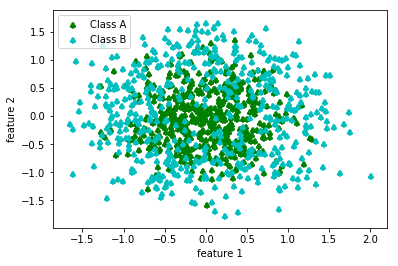

In [66]:
# Visualize the data since they are in 2D
showDataPoint2D(x_train,y_train)

In [54]:
#
# Look at the data.
#
n_samples_train, n_features = x_train.shape
n_samples_test, _ = x_test.shape
n_classes = len(np.unique(y_train))

print("Number of samples in training set: %d ( %d possitive, %d negative)" % (n_samples_train,np.sum(y_train==1),np.sum(y_train==0)))
print("Number of samples in the testing set: %d (%d possitive, %d negative)" % (n_samples_test,np.sum(y_test==1),np.sum(y_test==0)))
print("Number of features: " +  str(n_features))
print("Number of classes: " + str(n_classes))
print("IDs for class labels: " + str(np.unique(y_train)))




Number of samples in training set: 1005 ( 500 possitive, 505 negative)
Number of samples in the testing set: 495 (250 possitive, 245 negative)
Number of features: 2
Number of classes: 2
IDs for class labels: [0 1]


In [67]:
# Define the classificaiton model - KNeighborsClassifier() classifer.
model = KNeighborsClassifier(n_neighbors=3)

In [68]:
# Train the model using the training sets
model.fit(x_train,y_train)

#Predict Output
y_pred = model.predict(x_test)  

y_true = y_test


 This is the confusion matrix
[[169  76]
 [ 66 184]]

 This is the normalized confusion matrix.
[[0.34141414 0.15353535]
 [0.13333333 0.37171717]]
Confusion matrix, without normalization
[[169  76]
 [ 66 184]]


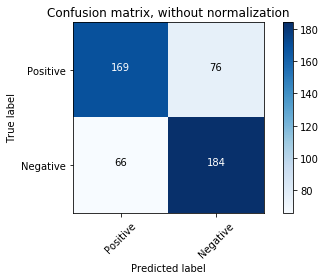

In [69]:
# Compute confusion matrix [Row: True Labels, Cols: Predicted]
# from sklearn.metrics import confusion_matrix
# Ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

print("\n This is the confusion matrix")
cnf_mx = metrics.confusion_matrix(y_true, y_pred)
print(cnf_mx)
# Rows are y_true, Cols as y_false

print("\n This is the normalized confusion matrix.")
cnf_mx_joint = cnf_mx.astype('float')/ cnf_mx.sum()
print(cnf_mx_joint)


# Draw a graph with the onfusion matrix. 
plt.figure()
class_names = {'Negative', 'Positive'}
plot_confusion_matrix(cnf_mx, classes=class_names, title='Confusion matrix, without normalization')

In [70]:
#
# Accuracy.
#
acc = metrics.accuracy_score(y_true, y_pred)
# Display the output
print("Accuracy: %.3f" % acc)



Accuracy: 0.713


In [71]:
#
# Calcualte precision, positive predictive value. .
# 
# The precision is the ratio tp / (tp + fp)
#
# where tp is the number of true positives and fp the number of false positives. 
#
# The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
# Alternativly, it denotes the probability that (1 denoting the positive class):
#
#      P(y_true=1| y_pred=1) 
#
# REf: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

precision = metrics.precision_score(y_true,y_pred, pos_label=0)  
print("Precision (for class y=0 as positive class): %.3f" % precision)




Precision (for class y=0 as positive class): 0.719


In [72]:

# Calculating Recall - TPR 
# Sensitivity, recall, hit rate, or true positive rate (TPR)
#
# The recall is given by the ration  tp/(tp + fn)
# 
# The recall is the ratio tp / (tp + fn) 
#     where tp is the number of true positives and fn the number of false negatives. 
#
#  The recall is intuitively the ability of the classifier to find all the positive samples.
#  Alternativly, it denotes the probability that (1 denoting the positive class):
#
#      P(y_pred=P |  y_true=P ) 
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

recall = metrics.recall_score(y_true, y_pred,pos_label=0)
print("1. Recall/TPR (for class y=0 as positive class): %.3f" % recall)



1. Recall/TPR (for class y=0 as positive class): 0.690


In [73]:
 
# Calculating f1-score. 
# 
# The F1 score can be interpreted as a weighted average of the precision and recall, where an 
#     F1 score reaches its best value at 1 and worst score at 0. 
#     The relative contribution of precision and recall to the F1 score are equal. 
#     The formula for the F1 score is:
#         
#       2*(precision*recall)/(precision + recall)
#   
# Ref : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

f1_score = metrics.f1_score(y_true,y_pred, pos_label=0)
print("1: F1_score (for class y=0 as positive class): %.3f" % f1_score )




1: F1_score (for class y=0 as positive class): 0.704


In [74]:
#
# Scikit learn provides a method to summarize the classification performance.
# The method returns table that summarized 'precision', 'recall', 'f1-score'  and 'support'
#

target_names = ['Negative', 'Positive']
print(metrics.classification_report(y_true,y_pred,target_names=target_names))

             precision    recall  f1-score   support

   Negative       0.72      0.69      0.70       245
   Positive       0.71      0.74      0.72       250

avg / total       0.71      0.71      0.71       495



# Visualizing the results on a 2D Classifier.

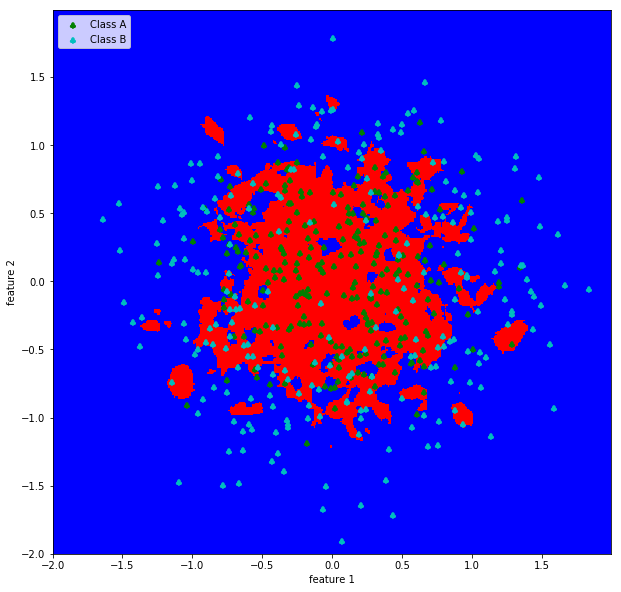

In [75]:
# Display training results.
plt.figure(figsize=(10,10))  # just to specify the figure size 

showDecisionBoundary2D(model)                 # Show the boundary region
showDataPoint2D(x_test,y_test)  # Overlay the datapoints

